In [1]:
import pandas as pd

In [5]:
train = pd.read_csv("train.csv", index_col = "PassengerId")

print(train.shape)
train.head()

(891, 11)


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
import matplotlib.pyplot as plt

In [8]:
%matplotlib inline
import seaborn as sns

# Explore

In [10]:
train.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

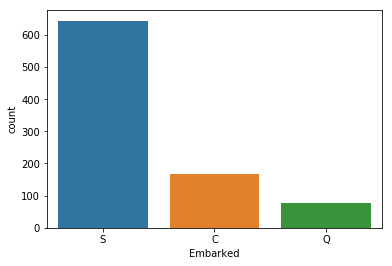

In [11]:
#탑승지 
sns.countplot(data = train, x = "Embarked")

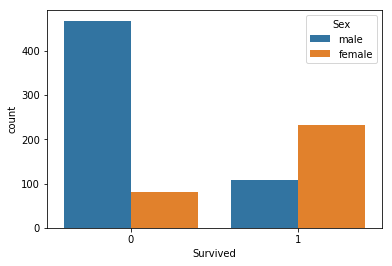

In [16]:
#성별로 남녀 생존 비교 
# 0은 사망, 1은 생존 
sns.countplot(data = train, x ="Survived", hue = "Sex")

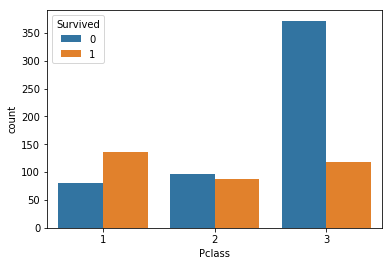

In [18]:
#등급별 생존율
#3등급 탑승객들의 사망이 가장 높다는 것을 알 수 있다. 

sns.countplot(data = train, x ="Pclass", hue = "Survived")

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


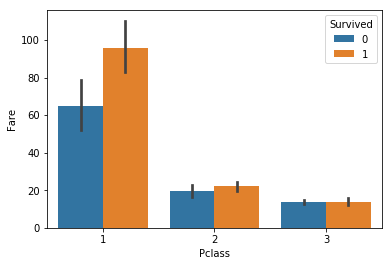

In [21]:
#barplot 사용하기 
sns.barplot(data = train, x = "Pclass", y="Fare", hue="Survived")

#### -countplot : y축 값이 없을 때, 
#### -barplot : continuos한 값을 사용. 

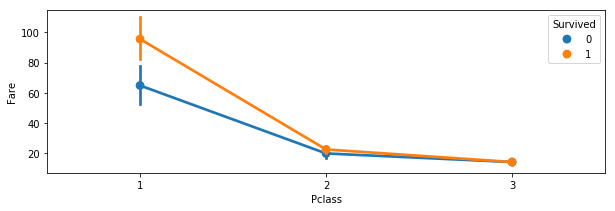

In [25]:
#pointplot은 시간당 매출과 같이 연관성, 연속하는 데이터에 사용하면 좋다.
plt.figure(figsize = (10,3))

sns.pointplot(data = train, x = "Pclass", y="Fare", hue="Survived")

# lmplot

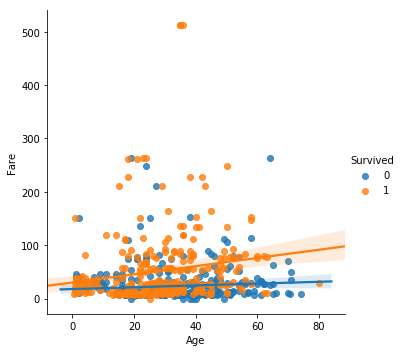

In [32]:
#두 데이터의 상관관계를 확인할 수 있음. 또, 어떤 것이 outlier인지 확인할 수 있다. 
sns.lmplot(data = train, x = "Age", y ="Fare", hue ="Survived")

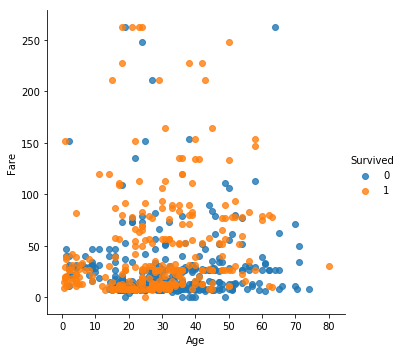

In [36]:
#outlier와 회귀선을 삭제
low_fare = train[train["Fare"] < 500]
sns.lmplot(data = low_fare, x = "Age", y ="Fare", hue ="Survived", fit_reg=False)

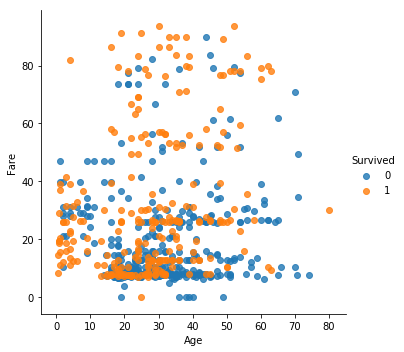

In [45]:
#요금의 범위를 조금 더 축소시켜보자. 

low_fare = train[train["Fare"] < 100]
low_lmp = sns.lmplot(data = low_fare, x = "Age", y ="Fare", hue ="Survived", fit_reg=False)

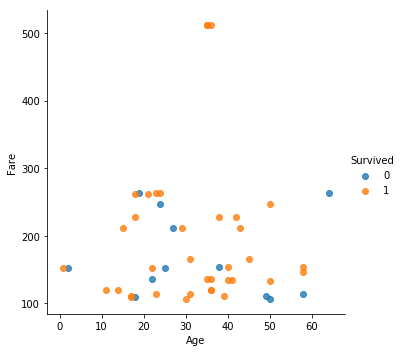

In [44]:
#반대로 요금의 범위가 높아진다면?
high_fare = train[train["Fare"] >100]
high_lmp =sns.lmplot(data = high_fare, x = "Age", y ="Fare", hue ="Survived", fit_reg=False)

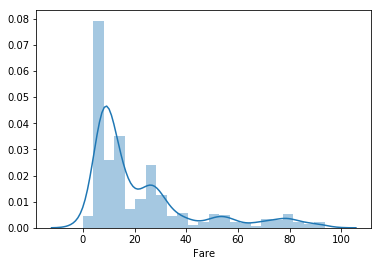

In [49]:
#요금을 분산도로 확인해보자. 

sns.distplot(low_fare["Fare"])

In [70]:
train["family_size"] = train["SibSp"] + train["Parch"] + 1

print(train.shape)

train[["SibSp", "Parch", "family_size"]].head()

(891, 12)


,SibSp,Parch,family_size
PassengerId,,,
1,1,0,2
2,1,0,2
3,0,0,1
4,1,0,2
5,0,0,1


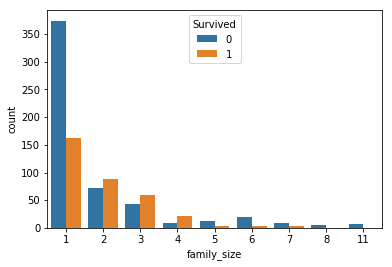

In [71]:
#가족의 탑승인원에 따라 생존인원을 확인 가능
# 일단 타이타닉은 생존인원이 사망인원보다 훨 적다. 
# 혼자 탑승한 경우엔 생존이 절반에 미치지 못한다. 
# 그러나 가족과 동반한 경우(2~4명)# 한명이라도 살려야 한다-일수도...?? 

sns.countplot(data=train, x="family_size", hue="Survived")

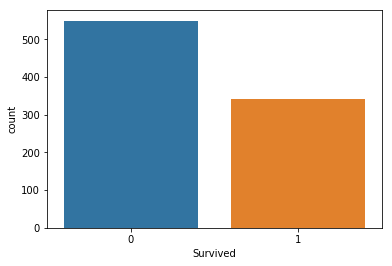

In [69]:
#전체생존/사망

sns.countplot(data=train, x="Survived")

In [72]:
#결혼유무(남녀) 생존 확인 
def get_title(name):
    return name.split(", ")[1].split('. ')[0]

train["Name"].apply(get_title).unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'the Countess',
       'Jonkheer'], dtype=object)

In [74]:
#Mr -결혼한 남성, Mrs-결혼한 여성, Miss-결혼하지 않은 여성, Master-결혼하지 않은 남성
#일단 주요 네가지만 확인
train.loc[train["Name"].str.contains("Mr"), "Title"] = "Mr"
train.loc[train["Name"].str.contains("Miss"), "Title"] = "Miss"
train.loc[train["Name"].str.contains("Mrs"), "Title"] = "Mrs"
train.loc[train["Name"].str.contains("Master"), "Title"] = "Master"

print(train.shape)
train[["Name", "Title"]].head(10)

(891, 13)


,Name,Title
PassengerId,,
1,"Braund, Mr. Owen Harris",Mr
2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",Mrs
3,"Heikkinen, Miss. Laina",Miss
4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",Mrs
5,"Allen, Mr. William Henry",Mr
6,"Moran, Mr. James",Mr
7,"McCarthy, Mr. Timothy J",Mr
8,"Palsson, Master. Gosta Leonard",Master
9,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",Mrs


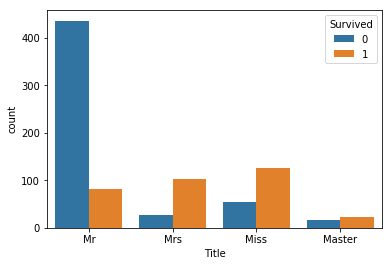

In [75]:
#결혼하지 않은 남성이 전체적으로 탑승인원이 적다는 걸 알 수 있지만, 결혼한 남성에 비해 생존함을 알 수 있다. 
sns.countplot(data=train, x="Title", hue="Survived")